## Estatística

A estatística abrange os conceitos matemáticos e as técnicas que aplicamos para compreender os dados.

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [5]:
friends_counts = Counter(num_friends)
friends_counts

Counter({100.0: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

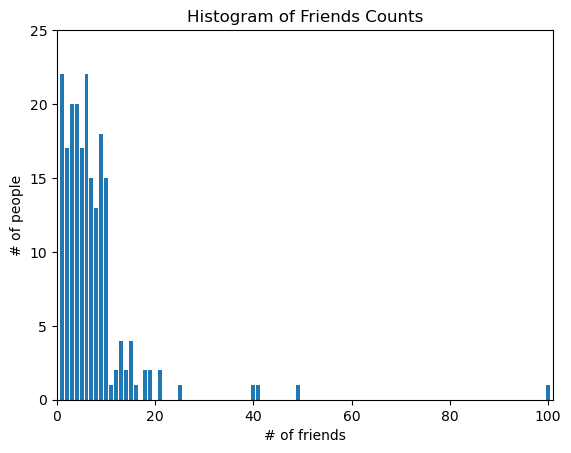

In [8]:
xs = range(101)
ys = [friends_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friends Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [10]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

print(f'Maior valor: {largest_value}, Menor valor: {smallest_value}')

Maior valor: 100.0, Menor valor: 1


In [13]:
sorted_values = sorted(num_friends)

smallest_values = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(f'Menor valor: {smallest_values}, Segundo menor valor: {second_smallest_value}, Segundo maior valor: {second_largest_value}')

Menor valor: 1, Segundo menor valor: 1, Segundo maior valor: 49


#### Tendências centrais

In [18]:
from typing import List

In [19]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [17]:
mean(num_friends)

7.333333333333333

In [28]:
def _median_odd(xs: List[float]) -> float:
    """if len(xs) is odd, median is the middle element"""
    
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """if len(xs) is even, it's the average of two middle elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    
    return (sorted(xs)[hi_midpoint - 1] + sorted(xs)[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Find the median value of v"""
    
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [31]:
assert median([1, 10, 2 , 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2+9)/2

In [32]:
print(median(num_friends))

6.0


In [37]:
def quantile(xs: List[float], p: float) -> float:
    """Return hte pth-percentile value in x"""
    p_index = int(p * len(xs))
    
    return sorted(xs)[p_index]

In [40]:
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [48]:
def mode(x: List[float]) -> List[float]:
    """Return a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items() if count == max_count]

In [51]:
assert set(mode(num_friends)) == {1, 6}

#### Dispersão

Dispersão expressa a medida da distribuição dos dados

In [52]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [54]:
assert data_range(num_friends) == 99

In [80]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    
    assert len(v) == len(w), "vectors must to be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Return v_1**2 + ... + v_n**2 """
    
    return dot(v, v)

In [81]:
def de_mean(xs: List[float]) -> List[float]:
    """"""
    x_bar = mean(xs)     # foi definida la no começo
    
    return [x - x_bar for x in xs]


# uma medida de dispersão mais complexa é a variancia
def variance(xs: List[float]) -> float:
    """Almost the average square deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    
    return sum_of_squares(deviations) / (n - 1)

In [65]:
assert 81.54 < variance(num_friends) < 81.55

In [92]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviations is the square root of the variance"""
    
    return math.sqrt(variance(xs))

In [93]:
assert 9.02 < standard_deviation(num_friends) < 9.04

In [76]:
def interquartile_range(xs: List[float]) -> float:
    """Return the difference between the 75#-tile and the 25#-tile"""
    
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [77]:
assert interquartile_range(num_friends) == 6

#### Correlação

In [79]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [84]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [86]:
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [94]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0

In [96]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

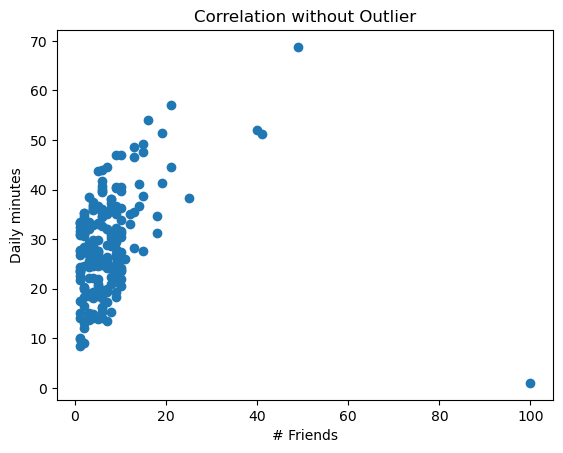

In [112]:
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation without Outlier")
plt.xlabel("# Friends")
plt.ylabel("Daily minutes")
plt.show()

In [98]:
# caso de outlier ter 1min e 100 amigos

outlier = num_friends.index(100)

In [104]:
num_friends_good = [x for i, x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                     if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [107]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

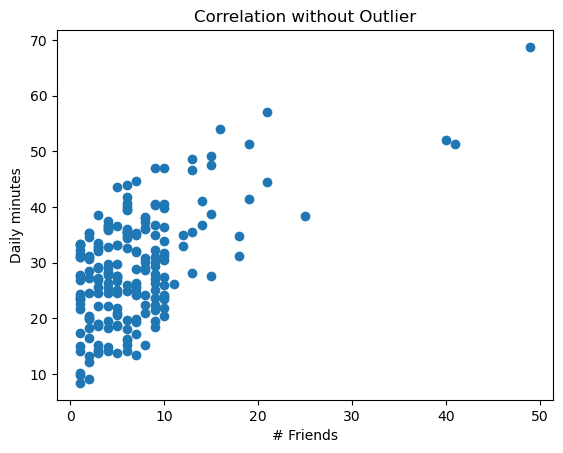

In [111]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation without Outlier")
plt.xlabel("# Friends")
plt.ylabel("Daily minutes")
plt.show()